# Лабораторная работа №2

## Задание:

1. Найти оптимумы тестовых функций лабы 1 с помощью двух алгоритмов этой библиотеки
2. Сконструировать нефункциональную(алгоритмическую) проблему оптимизации и решить в pygmo (не выполнено из-за проблем с Пигмо)

In [1]:
import math
from typing import Tuple, Mapping

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import numpy as np
from numpy import random

import pygmo as pg

## Функция Бута $$f(x,y) = (x+2y-7)^2+(2x+y-5)^2$$

In [2]:
class BoothOptimization:

    def __init__(self, x_min: float, x_max: float, y_min: float, y_max: float):

        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x):
        function_value = math.pow(x[0] + 2.0 * x[1] - 7.0, 2.0) + math.pow(2.0 * x[0] + x[1] - 5.0, 2.0)

        return [function_value]

In [3]:
udp = BoothOptimization(-10.0, 10.0, -10.0, 10.0)

prob = pg.problem(udp)

print(prob)

Problem name: <class '__main__.BoothOptimization'>
	C++ class name: class pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [4]:
number_of_generations = 1

current_seed = 171015

de_algo = pg.de(gen=number_of_generations, seed=current_seed)

algo = pg.algorithm(de_algo)

print(algo)

Algorithm name: DE: Differential Evolution [stochastic]
	C++ class name: class pagmo::de

	Thread safety: basic

Extra info:
	Generations: 1
	Parameter F: 0.800000
	Parameter CR: 0.900000
	Variant: 2
	Stopping xtol: 0.000001
	Stopping ftol: 0.000001
	Verbosity: 0
	Seed: 171015


In [5]:
pop_size = 1000

pop = pg.population(prob, size=pop_size, seed=current_seed)

inspect_pop = False
if inspect_pop:
    print(pop)

In [6]:
number_of_evolutions = 100

individuals_list = []
fitness_list = []

for i in range(number_of_evolutions):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])

print('Fitness (= function) value: ', pop.champion_f)
print('Decision variable vector: ', pop.champion_x)
print('Number of function evaluations: ', pop.problem.get_fevals())
print('Difference wrt the minimum: ', pop.champion_x - np.array([3,2]))

Fitness (= function) value:  [7.32770323e-18]
Decision variable vector:  [1. 3.]
Number of function evaluations:  101000
Difference wrt the minimum:  [-2.  1.]


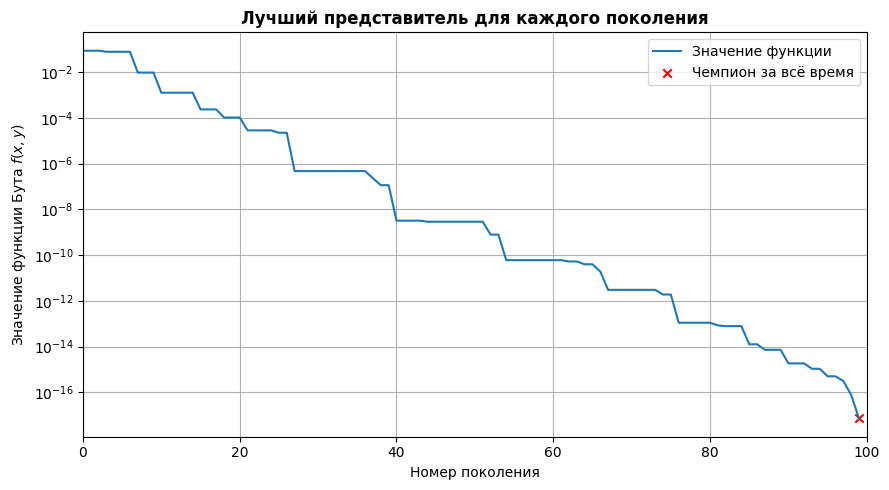

In [7]:
best_x = [ind[0] for ind in individuals_list]
best_y = [ind[1] for ind in individuals_list]

(x_min, y_min), (x_max, y_max) = udp.get_bounds()

fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, number_of_evolutions), fitness_list, label='Значение функции')

champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r', label='Чемпион за всё время')

ax.set_xlim((0, number_of_evolutions))
ax.grid('major')
ax.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax.set_xlabel('Номер поколения')
ax.set_ylabel(r'Значение функции Бута $f(x,y)$')
ax.legend(loc='upper right')
ax.set_yscale('log')
plt.tight_layout()

# Показ
plt.show()

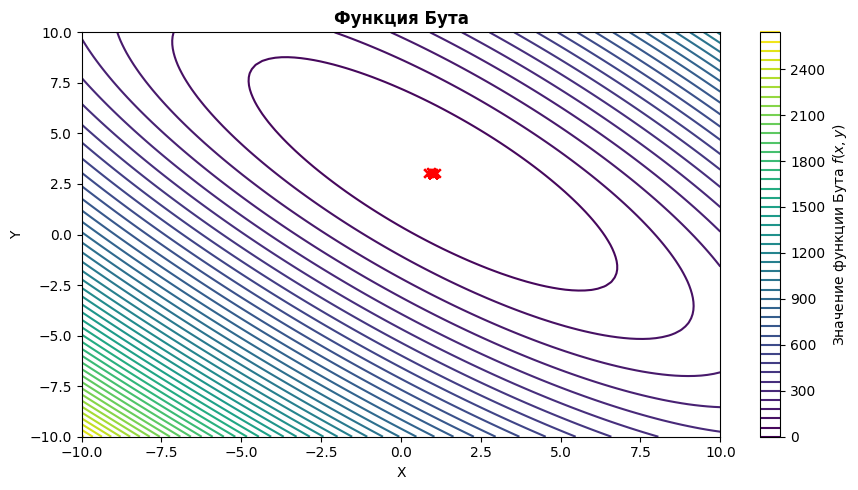

In [8]:
grid_points = 100
x_vector = np.linspace(x_min, x_max, grid_points)
y_vector = np.linspace(y_min, y_max, grid_points)
x_grid, y_grid = np.meshgrid(x_vector, y_vector)
z_grid = np.zeros((grid_points, grid_points))
for i in range(x_grid.shape[1]):
    for j in range(x_grid.shape[0]):
        z_grid[i, j] = udp.fitness([x_grid[i, j], y_grid[i, j]])[0]

fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(x_grid, y_grid, z_grid, 50)

ax.scatter(best_x, best_y, marker='x', color='r')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
ax.set_title('Функция Бута', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r'Значение функции Бута $f(x,y)$')
plt.tight_layout()

plt.show()

## Функция Матьяса $$f(x,y) = 0.26(x^2+y^2)-0.48xy$$

In [9]:
class MatyasOptimization:

    def __init__(self, x_min: float, x_max: float, y_min: float, y_max: float):

        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x):
        function_value = 0.26*(math.pow(x[0], 2)+math.pow(x[1], 2))-0.48*x[0]*x[1]

        return [function_value]

In [10]:
udp = MatyasOptimization(-10.0, 10.0, -10.0, 10.0)

prob = pg.problem(udp)

print(prob)

Problem name: <class '__main__.MatyasOptimization'>
	C++ class name: class pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [11]:
number_of_generations = 1

current_seed = 171015

de_algo = pg.de(gen=number_of_generations, seed=current_seed)

algo = pg.algorithm(de_algo)

print(algo)

Algorithm name: DE: Differential Evolution [stochastic]
	C++ class name: class pagmo::de

	Thread safety: basic

Extra info:
	Generations: 1
	Parameter F: 0.800000
	Parameter CR: 0.900000
	Variant: 2
	Stopping xtol: 0.000001
	Stopping ftol: 0.000001
	Verbosity: 0
	Seed: 171015


In [12]:
pop_size = 1000

pop = pg.population(prob, size=pop_size, seed=current_seed)

inspect_pop = False
if inspect_pop:
    print(pop)

In [13]:
number_of_evolutions = 100

individuals_list = []
fitness_list = []

for i in range(number_of_evolutions):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])

print('Fitness (= function) value: ', pop.champion_f)
print('Decision variable vector: ', pop.champion_x)
print('Number of function evaluations: ', pop.problem.get_fevals())
print('Difference wrt the minimum: ', pop.champion_x - np.array([3,2]))

Fitness (= function) value:  [7.29876553e-19]
Decision variable vector:  [5.84576682e-10 2.19993022e-09]
Number of function evaluations:  101000
Difference wrt the minimum:  [-3. -2.]


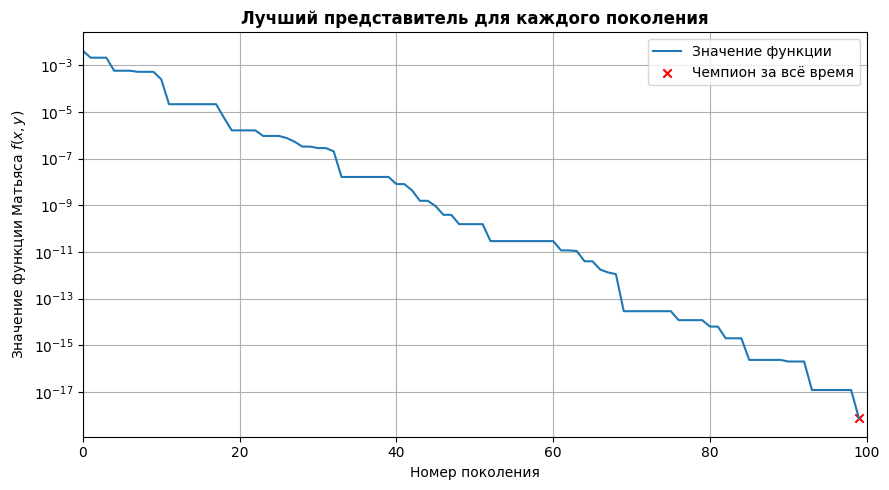

In [14]:
best_x = [ind[0] for ind in individuals_list]
best_y = [ind[1] for ind in individuals_list]

(x_min, y_min), (x_max, y_max) = udp.get_bounds()

fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, number_of_evolutions), fitness_list, label='Значение функции')

champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r', label='Чемпион за всё время')

ax.set_xlim((0, number_of_evolutions))
ax.grid('major')
ax.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax.set_xlabel('Номер поколения')
ax.set_ylabel(r'Значение функции Матьяса $f(x,y)$')
ax.legend(loc='upper right')
ax.set_yscale('log')
plt.tight_layout()

plt.show()

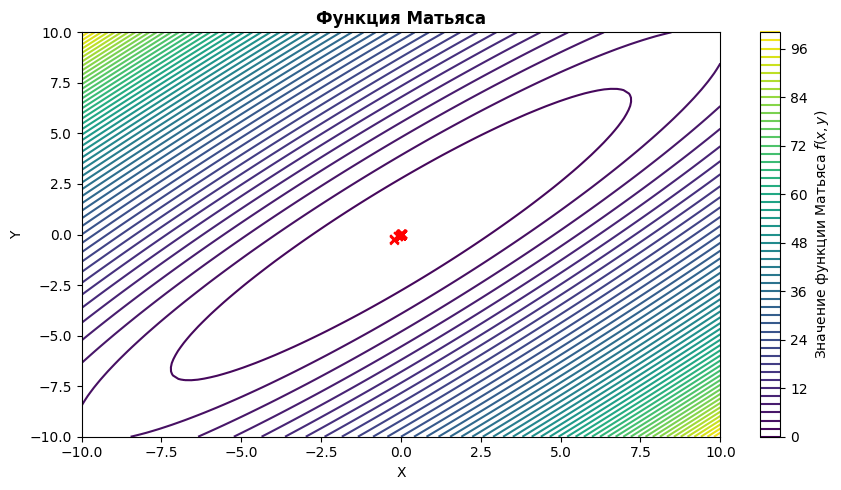

In [15]:
grid_points = 100
x_vector = np.linspace(x_min, x_max, grid_points)
y_vector = np.linspace(y_min, y_max, grid_points)
x_grid, y_grid = np.meshgrid(x_vector, y_vector)
z_grid = np.zeros((grid_points, grid_points))
for i in range(x_grid.shape[1]):
    for j in range(x_grid.shape[0]):
        z_grid[i, j] = udp.fitness([x_grid[i, j], y_grid[i, j]])[0]

fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(x_grid, y_grid, z_grid, 50)

ax.scatter(best_x, best_y, marker='x', color='r')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
ax.set_title('Функция Матьяса', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r'Значение функции Матьяса $f(x,y)$')
plt.tight_layout()

plt.show()